In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

5.1

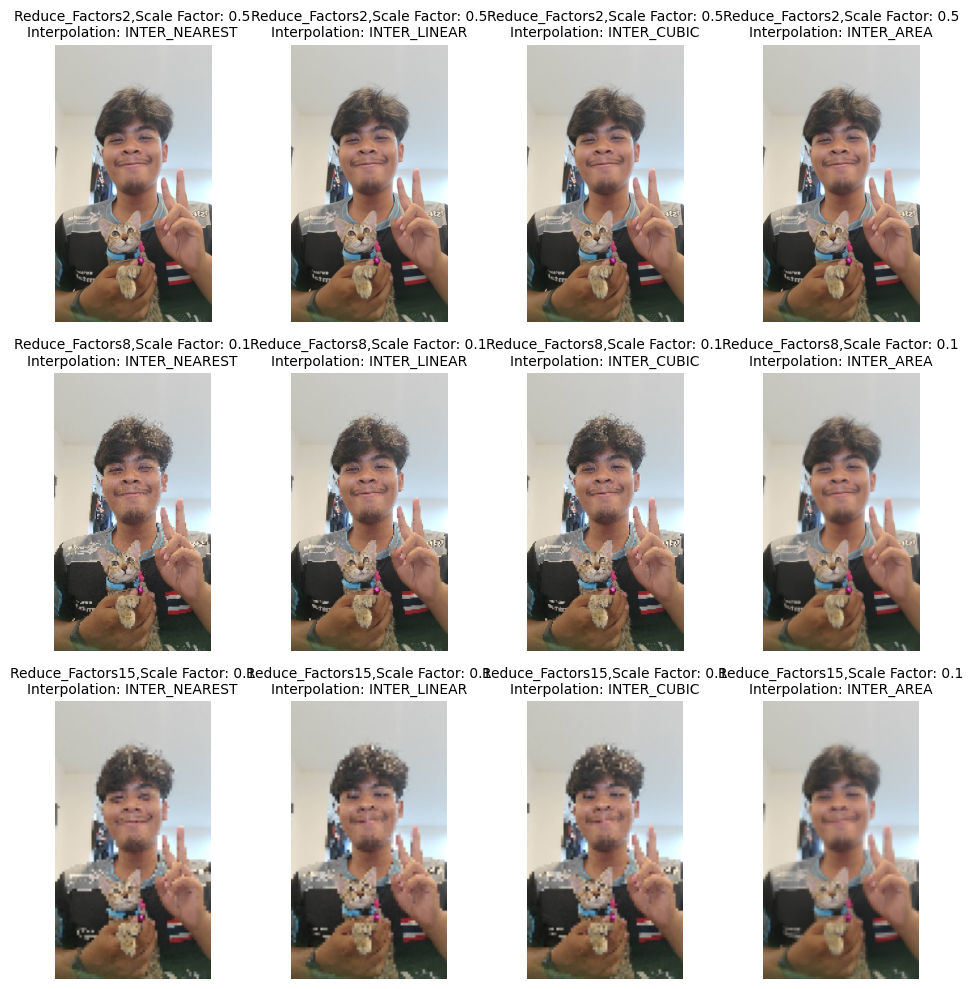

In [2]:
# Read image file
image = cv2.imread('./Lab5/image/Lumyai.jpg')

# Define resize factor
Reduce_factors = [2, 8, 15]  # At least 3 values
Scale_factors = [1 / factor for factor in Reduce_factors]  # Calculate scale factors

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
interpolation_titles = ["INTER_NEAREST", "INTER_LINEAR", "INTER_CUBIC", "INTER_AREA"]

# Create a subplot grid
num_rows = len(Scale_factors)
num_cols = len(inter_methods)
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, scale_factor in enumerate(Scale_factors):
    for j, inter_method in enumerate(inter_methods):
        # Resize the image using the current scale factor and interpolation method
        resized_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=inter_method)
        
        # Format the scale factor and interpolation method with one decimal place
        scale_factor_str = f'{scale_factor:.1f}'
        
        # Display the resized image in the corresponding subplot
        axs[i, j].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
        
        # Set the title with a smaller font size (e.g., fontsize=10)
        axs[i, j].set_title(
            f'Reduce_Factors{Reduce_factors[i]},Scale Factor: {scale_factor_str}\nInterpolation: {interpolation_titles[j]}',
            fontsize=10
        )
        axs[i, j].axis('off')

# Show the tabbed figure
plt.tight_layout()
plt.show()

In [ ]:
5.2

In [3]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Read image file
image = cv2.imread('./Lab5/image/Lumyai.jpg')

# Define resize factor
Reduce_factors = [2,4,5,7, 8, 15]  # At least 3 values
Scale_factors = [1 / factor for factor in Reduce_factors]  # Calculate scale factors

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]
interpolation_titles = ["INTER_NEAREST", "INTER_LINEAR", "INTER_CUBIC", "INTER_AREA"]

# Define fill methods
fill_methods = ['constant', 'nearest', 'reflect', 'wrap']

# Function to add Gaussian noise to an image
def add_gaussian_noise(img):
    # Generate Gaussian noise
    mean = 0
    std = 25  # You can adjust the standard deviation as needed
    gaussian_noise = np.random.normal(mean, std, img.shape).astype(np.float32)
    
    # Add the noise to the image
    noisy_img = np.clip(img.astype(np.float32) + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_img

# Parameters for image augmentation
Npic = 10
rotation_range = 40
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

# Prepare ImageDataGenerator with parameters for each fill_mode
video_frames = {fill_mode: [] for fill_mode in fill_methods}

for fill_mode in fill_methods:
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        preprocessing_function=add_gaussian_noise,
        fill_mode=fill_mode
    )

    # Generate augmented images and add them to the respective fill_mode's frame list
    for i in range(Npic):
        batch = datagen.flow(np.array([image]), batch_size=1)
        augmented_image = np.clip(batch[0], 0, 255).astype('uint8')
        video_frames[fill_mode].append(augmented_image[0])

# Create a VideoWriter object to save the frames as a video with a slower frame rate
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI format
frame_rate = 1  # Adjust the frame rate as needed (frames per second)
out = cv2.VideoWriter('augmented_video_slow.avi', fourcc, frame_rate, (image.shape[1], image.shape[0]))

# Write frames from each fill_mode to the video
for fill_mode in fill_methods:
    for frame in video_frames[fill_mode]:
        out.write(frame)

# Release the video writer
out.release()

print("Slow-motion video saved successfully.")


Slow-motion video saved successfully.


5.3